In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# Generating sample datset
N = 1000
Tp = 800

t = np.arange(0,N)
x = np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.526839
1,1.389806
2,1.366408
3,0.112967
4,1.754798


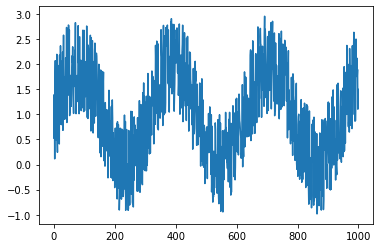

In [3]:
plt.plot(df)
plt.show()

In [4]:
values = df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [5]:
step = 4

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [6]:
test

array([ 0.58391196, -0.2334059 ,  0.79413887,  0.95463003,  1.0009234 ,
        0.46470475,  0.85666241, -0.29169574,  0.56184236,  0.07695974,
        0.532178  , -0.21241374,  1.2915929 ,  0.10571905, -0.35281284,
       -0.0677181 ,  0.17020639, -0.29556756,  1.11406629,  0.04511262,
        1.13081695, -0.14978408,  0.34799476,  1.22087797,  1.06769027,
        1.00156353,  0.59810429, -0.45748947,  0.81197584, -0.39395017,
        1.19346433, -0.38507696,  1.16444168,  1.15362802, -0.41676714,
        0.40087711, -0.43586501, -0.78881152, -0.05053672,  1.06570188,
       -0.07881909, -0.66473137, -0.26883869, -0.69477318, -0.28311712,
        0.13816803, -0.86086703,  0.79979863,  0.04426473,  0.40613954,
        0.35224104,  0.88613284, -0.62219841, -0.80834046,  0.94196142,
       -0.71789779, -0.14032413,  0.64989175,  0.39820753, -0.65668548,
        0.07507219,  0.4033161 , -0.06370981,  0.61421121, -0.9830613 ,
       -0.90773563, -0.43231053,  0.20877758, -0.53507633,  0.35

In [7]:
def convertToMatrix(data, step):
    X, Y = [],[]
    for i in range(len(data)-step):
        d = i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [8]:
trainX, trainY = convertToMatrix(train,step)
testX, testY = convertToMatrix(test,step)

In [9]:
trainX.shape

(800, 4)

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

In [11]:
model = Sequential()
model.add(SimpleRNN(units = 32,input_shape = (1,step),activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer ='rmsprop',loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(trainX,trainY, epochs = 100,batch_size = 10, verbose = 2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict,testPredict),axis = 0)

Epoch 1/100
80/80 - 12s - loss: 0.5670 - 12s/epoch - 146ms/step
Epoch 2/100
80/80 - 0s - loss: 0.4198 - 464ms/epoch - 6ms/step
Epoch 3/100
80/80 - 1s - loss: 0.4070 - 784ms/epoch - 10ms/step
Epoch 4/100
80/80 - 1s - loss: 0.4044 - 784ms/epoch - 10ms/step
Epoch 5/100
80/80 - 1s - loss: 0.4018 - 736ms/epoch - 9ms/step
Epoch 6/100
80/80 - 1s - loss: 0.3977 - 888ms/epoch - 11ms/step
Epoch 7/100
80/80 - 1s - loss: 0.3975 - 688ms/epoch - 9ms/step
Epoch 8/100
80/80 - 1s - loss: 0.3971 - 768ms/epoch - 10ms/step
Epoch 9/100
80/80 - 1s - loss: 0.3929 - 728ms/epoch - 9ms/step
Epoch 10/100
80/80 - 1s - loss: 0.3941 - 536ms/epoch - 7ms/step
Epoch 11/100
80/80 - 1s - loss: 0.3928 - 592ms/epoch - 7ms/step
Epoch 12/100
80/80 - 0s - loss: 0.3912 - 424ms/epoch - 5ms/step
Epoch 13/100
80/80 - 0s - loss: 0.3890 - 312ms/epoch - 4ms/step
Epoch 14/100
80/80 - 0s - loss: 0.3922 - 344ms/epoch - 4ms/step
Epoch 15/100
80/80 - 0s - loss: 0.3905 - 312ms/epoch - 4ms/step
Epoch 16/100
80/80 - 0s - loss: 0.3902 - 312

In [13]:
predicted

array([[ 1.00269520e+00],
       [ 1.14946079e+00],
       [ 1.33743644e+00],
       [ 1.36521626e+00],
       [ 1.61867893e+00],
       [ 1.28796744e+00],
       [ 1.29921734e+00],
       [ 1.42050898e+00],
       [ 1.06431961e+00],
       [ 1.43802309e+00],
       [ 1.49002695e+00],
       [ 9.34360504e-01],
       [ 1.37053621e+00],
       [ 1.12626171e+00],
       [ 7.19233513e-01],
       [ 9.47463453e-01],
       [ 1.04742575e+00],
       [ 1.24243355e+00],
       [ 1.57621992e+00],
       [ 1.59026647e+00],
       [ 1.52729726e+00],
       [ 1.61667979e+00],
       [ 1.32670116e+00],
       [ 1.20787442e+00],
       [ 1.32473254e+00],
       [ 1.29450083e+00],
       [ 1.29967678e+00],
       [ 1.33745360e+00],
       [ 1.41740036e+00],
       [ 1.74233758e+00],
       [ 1.68728375e+00],
       [ 1.63173914e+00],
       [ 1.63294387e+00],
       [ 1.29213774e+00],
       [ 1.32473803e+00],
       [ 1.40997601e+00],
       [ 1.45129228e+00],
       [ 1.60751486e+00],
       [ 1.5

In [14]:
trainScore = model.evaluate(trainX,trainY)
print(trainScore)

25/25 [==============================] - 1s 4ms/step - loss: 0.3450
0.34503525495529175


In [15]:
index = df.index.values
X = df.iloc[:,-1].values
X

array([ 0.52683902,  1.38980597,  1.366408  ,  0.11296658,  1.75479794,
        2.06699489,  1.35798027,  2.02071368,  0.72227043,  0.48378875,
        2.19321606,  0.52958062,  0.24391186,  1.89780902,  0.71614857,
        0.7338015 ,  0.43801114,  1.97082896,  0.40952477,  2.17600975,
        1.16728904,  0.8032668 ,  2.36243739,  1.1899795 ,  1.77102778,
        0.805636  ,  0.7932256 ,  2.05612472,  0.85050531,  2.23711453,
        0.68060268,  1.99475311,  2.57434386,  1.7854286 ,  1.61330961,
        1.73338029,  0.90125086,  1.37160563,  1.49103498,  2.12523356,
        1.462616  ,  1.18374159,  2.72774024,  0.836758  ,  1.93299664,
        1.97560105,  2.27500988,  1.38091311,  2.77622807,  2.76103169,
        2.09514031,  2.67632254,  0.97426465,  1.05347937,  1.67451072,
        1.77301158,  1.67006717,  1.15727946,  1.41260394,  1.93795911,
        2.1626635 ,  2.03823125,  2.34227135,  1.6543599 ,  1.2461846 ,
        1.01687606,  2.14095173,  1.55332775,  2.03278915,  2.26

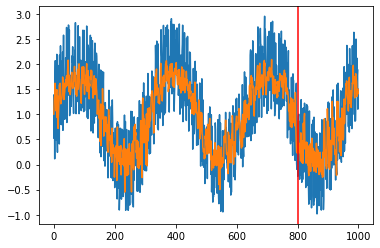

In [16]:
plt.plot(index,X)
plt.plot(index,predicted)
plt.axvline(df.index[Tp],c = 'r')
plt.show()